In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Link to the dataset
https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder

In [2]:
!ls

anno_test.csv	car_data   Proprocess.ipynb  train_data.csv
anno_train.csv	names.csv  test_data.csv


In [3]:
anno_train = pd.read_csv("anno_train.csv", header=None)
anno_train.columns = ["image", "upper_x", "upper_y", "bottom_x", "bottom_y", "class"]
anno_train.head()

,image,upper_x,upper_y,bottom_x,bottom_y,class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [4]:
train_dir = "car_data/train"
test_dir = "car_data/test"
car_names = pd.read_csv("names.csv", header=None, squeeze=True)
car_names.head()

0    AM General Hummer SUV 2000
1           Acura RL Sedan 2012
2           Acura TL Sedan 2012
3          Acura TL Type-S 2008
4          Acura TSX Sedan 2012
Name: 0, dtype: object

In [5]:
OUT_SIZE = (100, 100) # 100 x 100 images

In [ ]:
	name	upper_x	upper_y	bottom_x	bottom_y	class	model	path

In [10]:
def load_dataset(folder, annotations):
    data = []
    try:
        models = os.listdir(folder)
        for m in models:
            files = os.listdir(f"{folder}/{m}")
            for f in files:
                anno = annotations[annotations.image == f].iloc[0]
                data.append([f, 
                             anno.upper_x, anno.upper_y, 
                             anno.bottom_x, anno.bottom_y, 
                             anno["class"], m, 
                             f"{folder}/{m}/{f}"])
    except e as e:
        print(e)
        
    return pd.DataFrame(data=data, columns=["name", 
                                            "upper_x", "upper_y", 
                                            "bottom_x", "bottom_y", 
                                            "class", "model", "path"])

In [12]:
train_ds = load_dataset(train_dir, anno_train)
train_ds.head()

,name,upper_x,upper_y,bottom_x,bottom_y,class,model,path
0,03502.jpg,200,521,986,789,11,Aston Martin Virage Coupe 2012,car_data/train/Aston Martin Virage Coupe 2012/...
1,04611.jpg,595,348,1554,659,11,Aston Martin Virage Coupe 2012,car_data/train/Aston Martin Virage Coupe 2012/...
2,07118.jpg,25,54,596,295,11,Aston Martin Virage Coupe 2012,car_data/train/Aston Martin Virage Coupe 2012/...
3,03458.jpg,39,198,992,597,11,Aston Martin Virage Coupe 2012,car_data/train/Aston Martin Virage Coupe 2012/...
4,03184.jpg,88,158,746,395,11,Aston Martin Virage Coupe 2012,car_data/train/Aston Martin Virage Coupe 2012/...


In [14]:
train_ds[train_ds.name=="00001.jpg"]

,name,upper_x,upper_y,bottom_x,bottom_y,class,model,path
717,00001.jpg,39,116,569,375,14,Audi TTS Coupe 2012,car_data/train/Audi TTS Coupe 2012/00001.jpg


In [15]:
train_ds.shape

(8144, 8)

In [16]:
def show_image(image_path, bounds, ax):
    img = Image.open(image_path)
    ax.imshow(img)
    x1, y1, x2, y2 = bounds 
    rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1,edgecolor='r', facecolor="none")
    ax.add_patch(rect)

In [17]:
def process_one_image(image_path, bounds, output_size=OUT_SIZE):
    img = Image.open(image_path)
    img = img.crop(bounds)
    img = img.resize(output_size)
    img = img.convert("L")
    return img

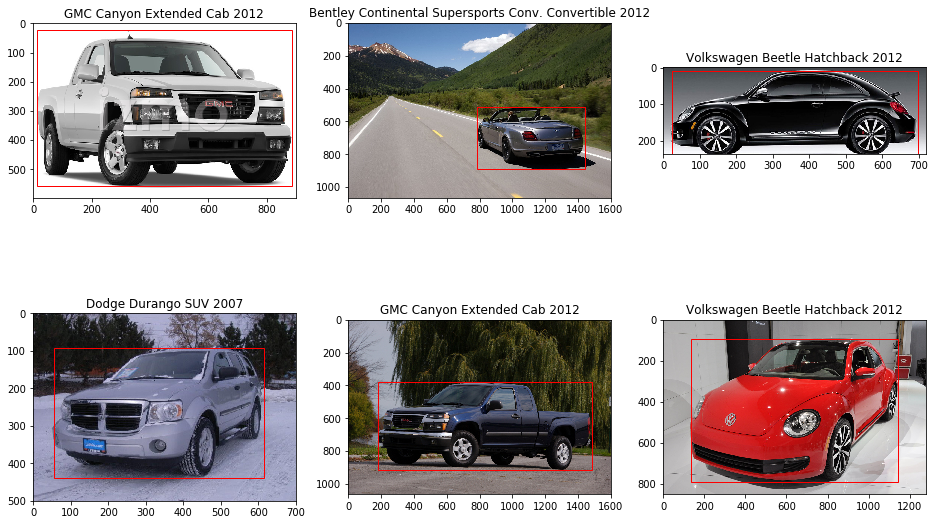

In [19]:
sample_indices = np.random.binomial(train_ds.shape[0], .3, 6)
sample = train_ds.iloc[sample_indices]
i = 1
plt.figure(figsize=(16, 10))
for index, row in sample.iterrows():
    bounds = (row.upper_x, row.upper_y, row.bottom_x, row.bottom_y)
    ax = plt.subplot(2, 3, i, title=row.model)
    show_image(row.path, bounds, ax)
    i+=1

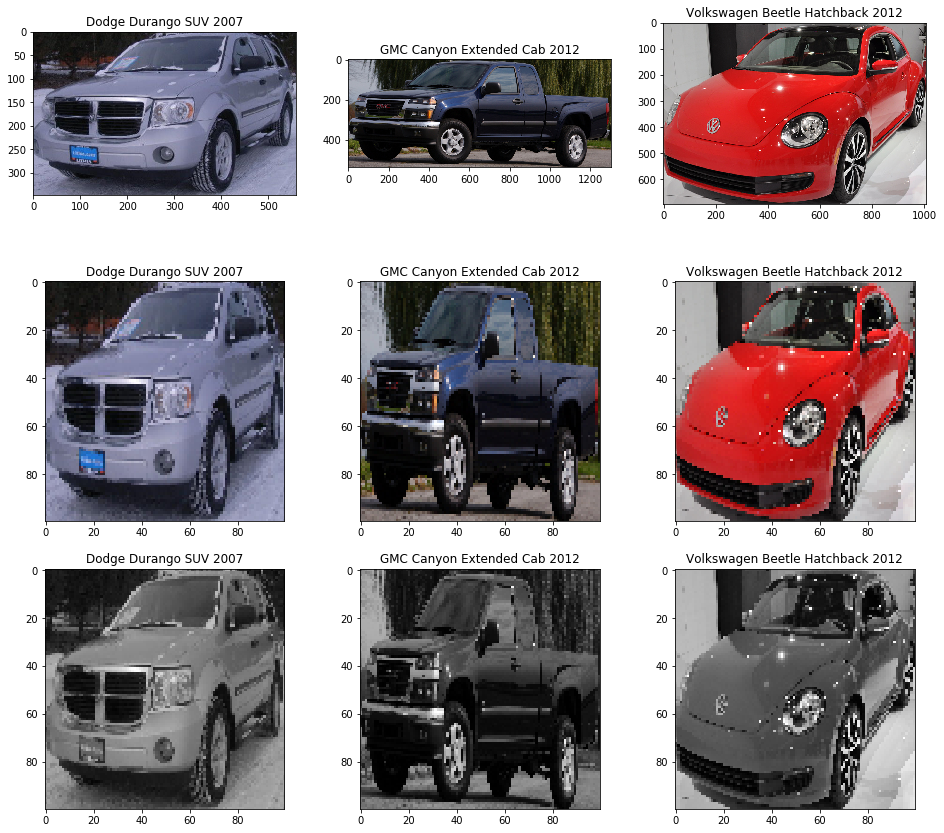

In [27]:
i=1
plt.figure(figsize=(16, 15))
for index, row in sample[3:].iterrows():
    bounds = (row.upper_x, row.upper_y, row.bottom_x, row.bottom_y)    
    img = Image.open(row.path)
    img = img.crop(bounds)
    ax = plt.subplot(3, 3, i, title=row.model)
    ax.imshow(img)
    img = img.resize(OUT_SIZE)
    ax = plt.subplot(3, 3, i+3, title=row.model)
    ax.imshow(img)
    img = img.convert("L")
    ax = plt.subplot(3, 3, i+6, title=row.model)
    ax.imshow(img)
    i+=1

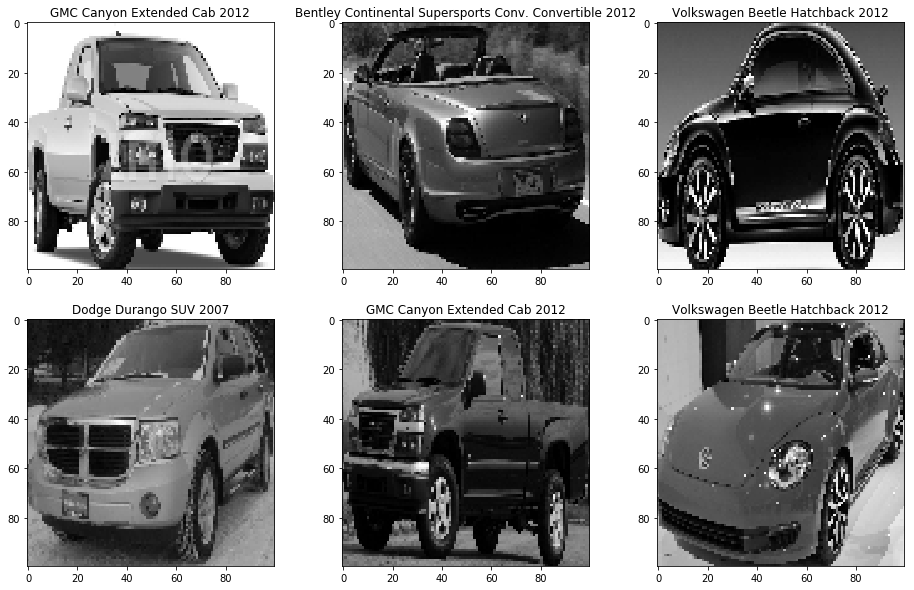

In [20]:
i=1
plt.figure(figsize=(16, 10))
for index, row in sample.iterrows():
    bounds = (row.upper_x, row.upper_y, row.bottom_x, row.bottom_y)
    ax = plt.subplot(2, 3, i, title=row.model)
    img = process_one_image(row.path, bounds, OUT_SIZE)
    ax.imshow(img)
    i+=1

In [45]:
def preprocess_and_save(dataset, output):
    for index, row in dataset.iterrows():
        bounds = (row.upper_x, row.upper_y, row.bottom_x, row.bottom_y)
        img = process_one_image(row.path, bounds, OUT_SIZE)
        img = np.round(np.array(list(img.getdata())) / 255.0, 5)
        img = map(lambda i: str(i), img)
        with open(output, "a+") as f:
            f.write(f"{row['name']},{','.join(img)},{row['class']}\n")

In [46]:
preprocess_and_save(ds, "train_data.csv")

In [48]:
anno_test = pd.read_csv("anno_test.csv", header=None)
anno_test.columns = ["image", "upper_x", "upper_y", "bottom_x", "bottom_y", "class"]
anno_test.head()

,image,upper_x,upper_y,bottom_x,bottom_y,class
0,00001.jpg,30,52,246,147,181
1,00002.jpg,100,19,576,203,103
2,00003.jpg,51,105,968,659,145
3,00004.jpg,67,84,581,407,187
4,00005.jpg,140,151,593,339,185


In [49]:
test_ds = load_dataset(test_dir, anno_test)
preprocess_and_save(test_ds, "test_data.csv")